In [2]:
#importing libraries
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


In [3]:
#importing testing dataset
data_t=pd.read_csv("fraudTest.csv")

In [4]:
#turning the testing dataset into a dataframe
data_test=pd.DataFrame(data_t)

In [5]:
#importing training dataset
data_tr=pd.read_csv("fraudTrain.csv")

In [6]:
#turning the training dataset into a dataframe
data_train=pd.DataFrame(data_tr)

In [7]:
#code to check for missing values from data
missing_values_train = data_train.isnull().sum()
print("Missing Values in training data:")
print(missing_values_train)

missing_values_test = data_test.isnull().sum()
print("Missing Values in testing data:")
print(missing_values_test)


Missing Values in training data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Missing Values in testing data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
stat

In [8]:
#code for finding out any duplicate rows
train_duplicate_rows = data_train.duplicated().sum()
print("Duplicate Rows in Training Data:")
print(train_duplicate_rows)

test_duplicate_rows = data_test.duplicated().sum()
print("Duplicate Rows in Training Data:")
print(test_duplicate_rows)

Duplicate Rows in Training Data:
0
Duplicate Rows in Training Data:
0


In [9]:
print("Columns Information:")
print(data_train.info())

Columns Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 1

In [10]:
print("Columns Information:")
print(data_test.info())

Columns Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long           

In [11]:
data_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


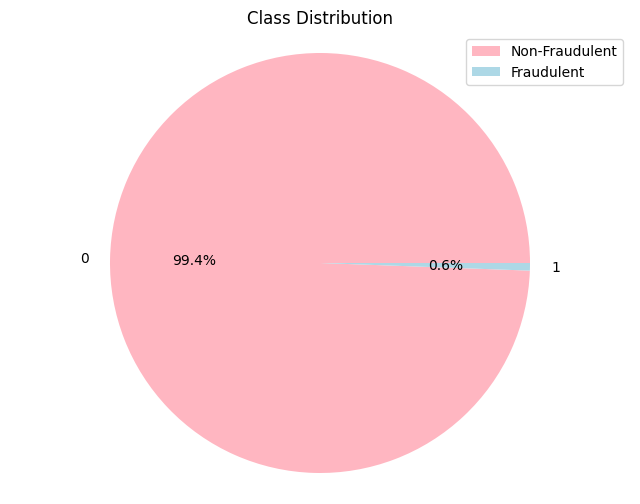

In [12]:


# Calculate class distribution
class_distribution = data_train['is_fraud'].value_counts()

# Plot the class distribution as a pie chart
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='pie', colors=['lightpink', 'lightblue'], autopct='%1.1f%%', startangle=0)
plt.title('Class Distribution')
plt.ylabel('')  # Remove the ylabel
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(labels=['Non-Fraudulent', 'Fraudulent'], loc='best')
plt.show()



In [13]:
#dropping columns that might not be directly related for analysis
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']

# Drop multiple columns from training dataset
data_train.drop(columns=columns_to_drop, inplace=True)

# Drop multiple columns from testing dataset
data_test.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the updated training dataset
print("Updated Training Dataset:")
print(data_train.head())

# Display the first few rows of the updated testing dataset
print("\nUpdated Testing Dataset:")
print(data_test.head())

Updated Training Dataset:
  trans_date_trans_time                            merchant       category  \
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

      amt gender  city_pop                                job         dob  \
0    4.97      F      3495          Psychologist, counselling  1988-03-09   
1  107.23      F       149  Special educational needs teacher  1978-06-21   
2  220.11      M      4154        Nature conservation officer  1962-01-19   
3   45.00      M      1939                    Patent attorney  1967-01-12   
4   41.96      M        99     Dance movement psychotherapist  1986-03-28   

   is_fraud  
0         0  
1         0  


In [14]:
#feature engineering
data_train['trans_date_trans_time'] = pd.to_datetime(data_train['trans_date_trans_time'])

# Extract day of the week
data_train['day_of_week'] = data_train['trans_date_trans_time'].dt.dayofweek

# Extract hour of the day
data_train['hour_of_day'] = data_train['trans_date_trans_time'].dt.hour

# Drop the original 'trans_date_trans_time' column
data_train.drop(columns=['trans_date_trans_time'], inplace=True)

# Display the updated dataset
print(data_train.head())

data_test['trans_date_trans_time'] = pd.to_datetime(data_test['trans_date_trans_time'])

# Extract day of the week
data_test['day_of_week'] = data_test['trans_date_trans_time'].dt.dayofweek

# Extract hour of the day
data_test['hour_of_day'] = data_test['trans_date_trans_time'].dt.hour

# Drop the original 'trans_date_trans_time' column
data_test.drop(columns=['trans_date_trans_time'], inplace=True)

# Display the updated dataset
print(data_test.head())

                             merchant       category     amt gender  city_pop  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F      3495   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F       149   
2                fraud_Lind-Buckridge  entertainment  220.11      M      4154   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M      1939   
4                 fraud_Keeling-Crist       misc_pos   41.96      M        99   

                                 job         dob  is_fraud  day_of_week  \
0          Psychologist, counselling  1988-03-09         0            1   
1  Special educational needs teacher  1978-06-21         0            1   
2        Nature conservation officer  1962-01-19         0            1   
3                    Patent attorney  1967-01-12         0            1   
4     Dance movement psychotherapist  1986-03-28         0            1   

   hour_of_day  
0            0  
1            0  
2          

In [15]:
print(data_train.columns)

Index(['merchant', 'category', 'amt', 'gender', 'city_pop', 'job', 'dob',
       'is_fraud', 'day_of_week', 'hour_of_day'],
      dtype='object')


In [16]:
data_test

,merchant,category,amt,gender,city_pop,job,dob,is_fraud,day_of_week,hour_of_day
0,fraud_Kirlin and Sons,personal_care,2.86,M,333497,Mechanical engineer,1968-03-19,0,6,12
1,fraud_Sporer-Keebler,personal_care,29.84,F,302,"Sales professional, IT",1990-01-17,0,6,12
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,34496,"Librarian, public",1970-10-21,0,6,12
3,fraud_Haley Group,misc_pos,60.05,M,54767,Set designer,1987-07-25,0,6,12
4,fraud_Johnston-Casper,travel,3.19,M,1126,Furniture designer,1955-07-06,0,6,12
...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,519,Town planner,1966-02-13,0,3,23
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,28739,Futures trader,1999-12-27,0,3,23
555716,fraud_Rau-Robel,kids_pets,86.88,F,3684,Musician,1981-11-29,0,3,23
555717,fraud_Breitenberg LLC,travel,7.99,M,129,Cartographer,1965-12-15,0,3,23


In [17]:
# Convert 'dob' column to datetime format in training dataset
data_train['dob'] = pd.to_datetime(data_train['dob'])

# Extract year, month, and day from 'dob' column
data_train['dob_year'] = data_train['dob'].dt.year
data_train['dob_month'] = data_train['dob'].dt.month
data_train['dob_day'] = data_train['dob'].dt.day

# Drop the original 'dob' column
data_train.drop(columns=['dob'], inplace=True)

# Convert 'dob' column to datetime format in testing dataset
data_test['dob'] = pd.to_datetime(data_test['dob'])

# Extract year, month, and day from 'dob' column
data_test['dob_year'] = data_test['dob'].dt.year
data_test['dob_month'] = data_test['dob'].dt.month
data_test['dob_day'] = data_test['dob'].dt.day

# Drop the original 'dob' column
data_test.drop(columns=['dob'], inplace=True)



In [18]:
#label encoding on training dataset


# Initialize LabelEncoder
label_encoder_train = LabelEncoder()
# Encode categorical variables using LabelEncoder
train_encoded = data_train.copy()  # Create a copy of the original DataFrame
train_encoded['merchant'] = label_encoder_train.fit_transform(train_encoded['merchant'])
train_encoded['category'] = label_encoder_train.fit_transform(train_encoded['category'])
train_encoded['gender'] = label_encoder_train.fit_transform(train_encoded['gender'])
train_encoded['job'] = label_encoder_train.fit_transform(train_encoded['job'])

# Display the first few rows of the encoded dataset
print(train_encoded.head())


   merchant  category     amt  gender  city_pop  job  is_fraud  day_of_week  \
0       514         8    4.97       0      3495  370         0            1   
1       241         4  107.23       0       149  428         0            1   
2       390         0  220.11       1      4154  307         0            1   
3       360         2   45.00       1      1939  328         0            1   
4       297         9   41.96       1        99  116         0            1   

   hour_of_day  dob_year  dob_month  dob_day  
0            0      1988          3        9  
1            0      1978          6       21  
2            0      1962          1       19  
3            0      1967          1       12  
4            0      1986          3       28  


In [19]:
#label encoding on testing dataset
label_encoder_test= LabelEncoder()
# Encode categorical variables using LabelEncoder
test_encoded = data_test.copy()  # Create a copy of the original DataFrame
test_encoded['merchant'] = label_encoder_test.fit_transform(test_encoded['merchant'])
test_encoded['category'] = label_encoder_test.fit_transform(test_encoded['category'])
test_encoded['gender'] = label_encoder_test.fit_transform(test_encoded['gender'])
test_encoded['job'] = label_encoder_test.fit_transform(test_encoded['job'])

# Display the first few rows of the encoded dataset
print(test_encoded.head())


   merchant  category    amt  gender  city_pop  job  is_fraud  day_of_week  \
0       319        10   2.86       1    333497  275         0            6   
1       591        10  29.84       0       302  392         0            6   
2       611         5  41.28       0     34496  259         0            6   
3       222         9  60.05       1     54767  407         0            6   
4       292        13   3.19       1      1126  196         0            6   

   hour_of_day  dob_year  dob_month  dob_day  
0           12      1968          3       19  
1           12      1990          1       17  
2           12      1970         10       21  
3           12      1987          7       25  
4           12      1955          7        6  


In [20]:
y_train=train_encoded['is_fraud']
y_test=test_encoded['is_fraud']

In [21]:
# Remove the 'is_fraud' column from the training and testing set
x_train= train_encoded.drop(columns=['is_fraud'])
x_test = test_encoded.drop(columns=['is_fraud'])

In [23]:


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_train_resampled, y_train_resampled)

# Predict the labels for the testing set
y_pred = rf_classifier.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9962373069842853


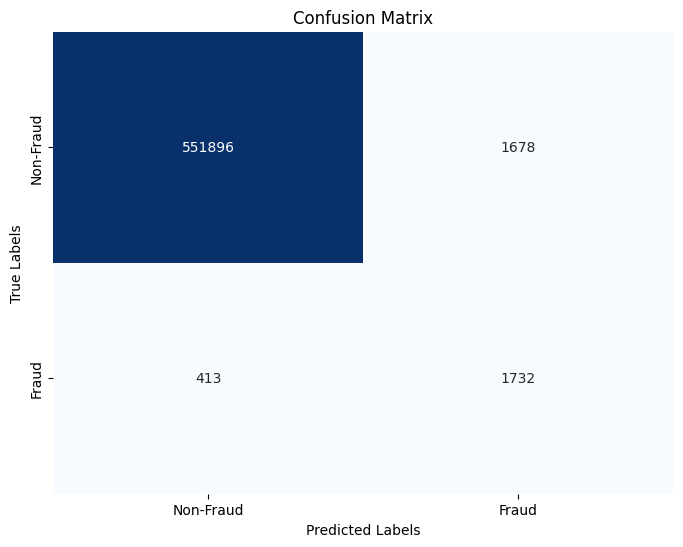

In [29]:

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
